# "Intro to Collaborative Filtering" plus homework

## Authors: Dmitry Ignatov
Freely avaiable for non-commercial purposes. The code examples are based on T. Segaran [Programming Collective Intelligence book. Chapter 2](http://shop.oreilly.com/product/9780596529321.do)

The homework talsk is formulated in the last cells. Please send the results to TA (futurelife@gmail.com) and the lecturer (dmitrii.ignatov@gmail.com) with a *mandatory* topic [MMDA-HW2-RecSys]-Your-Full-Name.



### Deadlines: Soft – December 17, 22; Hard – December 19, 2022


## Dictionary with user preferences

In [1]:
# A dictionary of movie critics and their ratings of a small
# set of movies

critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

In [2]:
critics['Toby']

{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [3]:
critics['Lisa Rose']['Lady in the Water']

2.5

In [4]:
#Euclid distance
from math import sqrt
sqrt(pow(5-4,2)+pow(4-1,2))


3.1622776601683795

In [5]:
#distance-based simialrity 
1/(1+sqrt(pow(5-4.5,2)+pow(5-5,2)))

0.6666666666666666

In [6]:
from numpy import exp

In [8]:
exp(-0.3*sqrt(pow(5-4.5,2)+pow(5-5,2))**2)


0.9277434863285529

In [10]:
from math import sqrt
# Returns a distance-based similarity score for person1 and person2
def sim_distance(prefs,person1,person2):
# Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
# if they have no ratings in common, return 0
    if len(si)==0: return 0
# Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
    for item in prefs[person1] if item in prefs[person2]])
    return 1/(1+sum_of_squares)


In [11]:
from math import sqrt
# Returns a distance-based similarity score for person1 and person2
def sim_kernel(prefs,person1,person2,alpha=0.3):
# Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
# if they have no ratings in common, return 0
    if len(si)==0: return 0
# Add up the squares of all the differences and take the wieghted exponent
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
    for item in prefs[person1] if item in prefs[person2]])
    return exp(-alpha*sum_of_squares)

In [13]:
sim_kernel(critics, 'Lisa Rose','Toby')

0.3499377491111553

In [14]:
sim_distance(critics, 'Lisa Rose','Toby')

0.2222222222222222

In [15]:
# Returns the Pearson correlation coefficient for p1 and p2
def sim_pearson(prefs,p1,p2):
 # Get the list of mutually rated items
    si={}
    for item in prefs[p1]: 
        if item in prefs[p2]: si[item]=1

     # if they are no ratings in common, return 0
    if len(si)==0: return 0

    # The number of mutually rated movies
    n=len(si)
  
    # Sums of all the preferences
    sum1=sum([prefs[p1][it] for it in si])
    sum2=sum([prefs[p2][it] for it in si])
  
    # Sums of the squares
    sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
    sum2Sq=sum([pow(prefs[p2][it],2) for it in si])	
  
     # Sum of the products
    pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si])
  
     # Calculate r (Pearson score)
    num=pSum-(sum1*sum2/n)
    den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
    if den==0: return 0

    r=num/den

    return r

In [17]:
sim_pearson(critics,'Lisa Rose','Gene Seymour'), sim_distance(critics, 'Lisa Rose','Gene Seymour')



(0.39605901719066977, 0.14814814814814814)

##  Ranking of critics

In [18]:
# Returns the best matches for person from the prefs dictionary. 
# Number of results and similarity function are optional params.

def topMatches(prefs,person,n=5,similarity=sim_pearson):
    scores=[(similarity(prefs,person,other),other)
    for other in prefs if other!=person]
    # Descending sorting
    scores.sort( )
    scores.reverse( )
    return scores[0:n]


In [19]:
topMatches(critics,'Toby',n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

In [20]:
topMatches(critics,'Toby',n=3, similarity=sim_kernel)

[(0.5091564206075492, 'Mick LaSalle'),
 (0.4723665527410147, 'Michael Phillips'),
 (0.37719235356315695, 'Claudia Puig')]

In [21]:
topMatches(critics,'Toby',n=3, similarity=sim_distance)

[(0.3076923076923077, 'Mick LaSalle'),
 (0.2857142857142857, 'Michael Phillips'),
 (0.23529411764705882, 'Claudia Puig')]

## Movie recommendation (User-based approach)

In [22]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings

def getRecommendations(prefs,person,similarity=sim_pearson):
    totals={}
    simSums={}
    for other in prefs:
     # don't compare me to myself
        if other==person: continue
        sim=similarity(prefs,person,other)
     # ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:
    # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
     # Similarity * Score
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
        # Sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+=sim
     # Create the normalized list
    rankings=[(total/simSums[item],item) for item,total in totals.items( )]
    # Return the sorted list
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [24]:
getRecommendations(critics,'Toby')


[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [25]:
getRecommendations(critics,'Toby', sim_kernel)

[(3.5469111370529656, 'The Night Listener'),
 (2.729687080418633, 'Lady in the Water'),
 (2.518799545549861, 'Just My Luck')]

In [26]:
getRecommendations(critics,'Toby', sim_distance)

[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074374, 'Just My Luck')]

## Items similarity

How to replace 

{'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5}}

by

{'Lady in the Water':{'Lisa Rose':2.5,'Gene Seymour':3.0},
'Snakes on a Plane':{'Lisa Rose':3.5,'Gene Seymour':3.5}}?


In [28]:
def transformPrefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item,{})
    # Flip item and person
    
            result[item][person]=prefs[person][item]
    return result

In [29]:
movies=transformPrefs(critics)


In [30]:
movies

{'Lady in the Water': {'Lisa Rose': 2.5,
  'Gene Seymour': 3.0,
  'Michael Phillips': 2.5,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 3.0},
 'Snakes on a Plane': {'Lisa Rose': 3.5,
  'Gene Seymour': 3.5,
  'Michael Phillips': 3.0,
  'Claudia Puig': 3.5,
  'Mick LaSalle': 4.0,
  'Jack Matthews': 4.0,
  'Toby': 4.5},
 'Just My Luck': {'Lisa Rose': 3.0,
  'Gene Seymour': 1.5,
  'Claudia Puig': 3.0,
  'Mick LaSalle': 2.0},
 'Superman Returns': {'Lisa Rose': 3.5,
  'Gene Seymour': 5.0,
  'Michael Phillips': 3.5,
  'Claudia Puig': 4.0,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 5.0,
  'Toby': 4.0},
 'You, Me and Dupree': {'Lisa Rose': 2.5,
  'Gene Seymour': 3.5,
  'Claudia Puig': 2.5,
  'Mick LaSalle': 2.0,
  'Jack Matthews': 3.5,
  'Toby': 1.0},
 'The Night Listener': {'Lisa Rose': 3.0,
  'Gene Seymour': 3.0,
  'Michael Phillips': 4.0,
  'Claudia Puig': 4.5,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 3.0}}

In [28]:
topMatches(movies,'Snakes on a Plane',5, sim_pearson)

[(0.7637626158259785, 'Lady in the Water'),
 (0.11180339887498941, 'Superman Returns'),
 (-0.3333333333333333, 'Just My Luck'),
 (-0.5663521139548527, 'The Night Listener'),
 (-0.6454972243679047, 'You, Me and Dupree')]

In [31]:
topMatches(movies,'Snakes on a Plane',5, sim_distance)

[(0.2222222222222222, 'Lady in the Water'),
 (0.18181818181818182, 'The Night Listener'),
 (0.16666666666666666, 'Superman Returns'),
 (0.10526315789473684, 'Just My Luck'),
 (0.05128205128205128, 'You, Me and Dupree')]

In [25]:
getRecommendations(movies,'Lady in the Water', sim_distance)

[(3.352635310801229, 'Claudia Puig'), (2.4730878186968837, 'Toby')]

## Item-based collaborative filtering

In [32]:
def calculateSimilarItems(prefs,n=10):
    # Create a dictionary of items showing which other items they
  # are most similar to.
    result={}
    # Invert the preference matrix to be item-centric
    itemPrefs=transformPrefs(prefs)
    c=0
    for item in itemPrefs:
    # Status updates for large datasets
        c+=1
        if c%100==0: print("%d / %d" % (c,len(itemPrefs)))
    # Find the most similar items to this one
        scores=topMatches(itemPrefs,item,n=n,similarity=sim_distance)
        result[item]=scores
    return result

In [33]:
itemsim=calculateSimilarItems(critics)
itemsim

{'Lady in the Water': [(0.4, 'You, Me and Dupree'),
  (0.2857142857142857, 'The Night Listener'),
  (0.2222222222222222, 'Snakes on a Plane'),
  (0.2222222222222222, 'Just My Luck'),
  (0.09090909090909091, 'Superman Returns')],
 'Snakes on a Plane': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'The Night Listener'),
  (0.16666666666666666, 'Superman Returns'),
  (0.10526315789473684, 'Just My Luck'),
  (0.05128205128205128, 'You, Me and Dupree')],
 'Just My Luck': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'You, Me and Dupree'),
  (0.15384615384615385, 'The Night Listener'),
  (0.10526315789473684, 'Snakes on a Plane'),
  (0.06451612903225806, 'Superman Returns')],
 'Superman Returns': [(0.16666666666666666, 'Snakes on a Plane'),
  (0.10256410256410256, 'The Night Listener'),
  (0.09090909090909091, 'Lady in the Water'),
  (0.06451612903225806, 'Just My Luck'),
  (0.05333333333333334, 'You, Me and Dupree')],
 'You, Me and Dupree': [(0.4,

In [34]:
def getRecommendedItems(prefs,itemMatch,user):
    userRatings=prefs[user]
    scores={}
    totalSim={}

    # Loop over items rated by this user
    for (item,rating) in userRatings.items():
        
    # Loop over items similar to this one
        for (similarity,item2) in itemMatch[item]:
    # Ignore if this user has already rated this item
            if item2 in userRatings: continue
         # Weighted sum of rating times similarity
            scores.setdefault(item2,0)
            scores[item2]+=similarity*rating
         # Sum of all the similarities
            totalSim.setdefault(item2,0)
            totalSim[item2]+=similarity
            if totalSim[item2]==0: totalSim[item2]=0.0000001 # to avoid divison by zero
    # Divide each total score by total weighting to get an average
    rankings=[(score/totalSim[item],item) for item,score in scores.items( ) ]

    # Return the rankings from highest to lowest
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [35]:
getRecommendedItems(critics,itemsim,'Toby')


[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]

## Recommendations on MovieLens data 

Source: http://grouplens.org/datasets/movielens/

In [36]:
def loadMovieLens(path='data/'):
# Get movie titles
    movies={}
    for line in open(path+'/u.item'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
 # Load data
    prefs={}
    for line in open(path+'/u.data'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [37]:
prefs=loadMovieLens( )

In [41]:
prefs['87']

{'Naked Gun 33 1/3: The Final Insult (1994)': 4.0,
 'Con Air (1997)': 4.0,
 'Sabrina (1995)': 4.0,
 'Waterworld (1995)': 4.0,
 'To Wong Foo, Thanks for Everything! Julie Newmar (1995)': 3.0,
 'Clueless (1995)': 4.0,
 'Jurassic Park (1993)': 5.0,
 'Brady Bunch Movie, The (1995)': 2.0,
 'Son in Law (1993)': 4.0,
 'Indiana Jones and the Last Crusade (1989)': 5.0,
 'Good, The Bad and The Ugly, The (1966)': 5.0,
 'Dead Poets Society (1989)': 5.0,
 'Dead Man Walking (1995)': 4.0,
 "Joe's Apartment (1996)": 2.0,
 'GoldenEye (1995)': 4.0,
 'M*A*S*H (1970)': 5.0,
 'Something to Talk About (1995)': 2.0,
 'Lightning Jack (1994)': 3.0,
 'Big Green, The (1995)': 3.0,
 'Cowboy Way, The (1994)': 3.0,
 "Ulee's Gold (1997)": 3.0,
 'Addams Family Values (1993)': 2.0,
 '2001: A Space Odyssey (1968)': 5.0,
 'Platoon (1986)': 3.0,
 'Return of the Pink Panther, The (1974)': 4.0,
 'Four Weddings and a Funeral (1994)': 5.0,
 'Under Siege (1992)': 4.0,
 'Ace Ventura: Pet Detective (1994)': 4.0,
 'Die Hard: Wit

In [42]:
len(prefs['87'])

210

In [46]:
getRecommendations(prefs,'87')[0:6]

[(5.0, 'They Made Me a Criminal (1939)'),
 (5.0, 'Star Kid (1997)'),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)')]

In [47]:
itemsim=calculateSimilarItems(prefs,n=50)

100 / 1664
200 / 1664
300 / 1664
400 / 1664
500 / 1664
600 / 1664
700 / 1664
800 / 1664
900 / 1664
1000 / 1664
1100 / 1664
1200 / 1664
1300 / 1664
1400 / 1664
1500 / 1664
1600 / 1664


In [49]:
itemsim['Star Kid (1997)']

[(1.0, 'Wonderland (1997)'),
 (1.0, 'Spice World (1997)'),
 (1.0, 'Sphere (1998)'),
 (1.0, 'Spawn (1997)'),
 (1.0, 'Shooting Fish (1997)'),
 (1.0, 'Shadow Conspiracy (1997)'),
 (1.0, 'Replacement Killers, The (1998)'),
 (1.0, 'Red Corner (1997)'),
 (1.0, 'Prophecy II, The (1998)'),
 (1.0, 'Playing God (1997)'),
 (1.0, 'Peacemaker, The (1997)'),
 (1.0, 'Murder at 1600 (1997)'),
 (1.0, 'Mortal Kombat: Annihilation (1997)'),
 (1.0, 'Magic Hour, The (1998)'),
 (1.0, 'Leading Man, The (1996)'),
 (1.0, 'Kull the Conqueror (1997)'),
 (1.0, 'Kicked in the Head (1997)'),
 (1.0, 'Jackal, The (1997)'),
 (1.0, 'Hugo Pool (1997)'),
 (1.0, 'How to Be a Player (1997)'),
 (1.0, 'Half Baked (1998)'),
 (1.0, 'Good Will Hunting (1997)'),
 (1.0, 'Four Days in September (1997)'),
 (1.0, 'Fire Down Below (1997)'),
 (1.0, 'Fast, Cheap & Out of Control (1997)'),
 (1.0, 'Fallen (1998)'),
 (1.0, 'Edge, The (1997)'),
 (1.0, 'Duoluo tianshi (1995)'),
 (1.0, 'Desperate Measures (1998)'),
 (1.0, "Dante's Peak (1997

In [50]:
getRecommendedItems(prefs,itemsim,'87')[0:30]

[(5.0, "What's Eating Gilbert Grape (1993)"),
 (5.0, 'Vertigo (1958)'),
 (5.0, 'Usual Suspects, The (1995)'),
 (5.0, 'Toy Story (1995)'),
 (5.0, 'Titanic (1997)'),
 (5.0, 'Sword in the Stone, The (1963)'),
 (5.0, 'Stand by Me (1986)'),
 (5.0, 'Sling Blade (1996)'),
 (5.0, 'Silence of the Lambs, The (1991)'),
 (5.0, 'Shining, The (1980)'),
 (5.0, 'Shine (1996)'),
 (5.0, 'Sense and Sensibility (1995)'),
 (5.0, 'Scream (1996)'),
 (5.0, 'Rumble in the Bronx (1995)'),
 (5.0, 'Rock, The (1996)'),
 (5.0, 'Robin Hood: Prince of Thieves (1991)'),
 (5.0, 'Reservoir Dogs (1992)'),
 (5.0, 'Police Story 4: Project S (Chao ji ji hua) (1993)'),
 (5.0, 'House of the Spirits, The (1993)'),
 (5.0, 'Fresh (1994)'),
 (5.0, 'Denise Calls Up (1995)'),
 (5.0, 'Day the Sun Turned Cold, The (Tianguo niezi) (1994)'),
 (5.0, 'Before the Rain (Pred dozhdot) (1994)'),
 (5.0, 'Assignment, The (1997)'),
 (5.0, '1-900 (1994)'),
 (4.875, "Ed's Next Move (1996)"),
 (4.833333333333333, 'Anna (1996)'),
 (4.8, 'Dark City 

In [51]:
setIB=set([t[1] for t in  getRecommendedItems(prefs,itemsim,'87')[0:30]])

In [52]:
setUB=set([t[1] for t in getRecommendations(prefs,'87')[0:30]])


In [53]:
setIB.intersection(setUB)

{'Anna (1996)', 'Usual Suspects, The (1995)'}

# Homework 2 (RecSys). Comparison of User-based and Item-based approaches

1. Implement MAE  and RMSE errors' estimators for [Movie Lens](http://grouplens.org/datasets/movielens/) data with 100,000 ratings.  
As a training set you need a file with .base extension, but a testing set has extension .test: the pairs of files u1.base and u1.test, ..., u5.base and u5.test. Each such pair is the 80%/20% random split of the input data for all users $u$ into test and training sets.
2. For each method (user-based and item-based) plot MAE and RMSE dependence by the number of neighbours  in a range from 1 to 100 with a reasonable step.
3. If you are not satisfied with your prediction quality (MAE>1.0), then try formulas 2.6 and 2.7 from the review http://files.grouplens.org/papers/FnT%20CF%20Recsys%20Survey.pdf.

There are alternative formulas: $r_{u,i} = k\sum\limits_{u^\prime \in U}\operatorname{sim}(u,u^\prime)r_{u^\prime, i} \mbox{ (the case of user-based model):}$
$$r_{u,i} = \frac{1}{N}\sum\limits_{u^\prime \in U}r_{u^\prime, i}$$
$$r_{u,i} = \bar{r_u} +  k\sum\limits_{u^\prime \in U} sim(u,u^\prime)(r_{u^\prime, i}-\bar{r_{u^\prime}} ) \mbox{, где } k =1/\sum_{u^\prime \in U}|\operatorname{sim}(u,u^\prime)|.$$

4. Compare the results as in 1 and 2. 

5. How MAE (RMSE) varies by the top-n size: $n \in \{1,3,5,10,15,20,30,40,50,100\}$? 

6. Which movies are recommended more often -- popular with high ratings or rare ones (i.e. with low number of ratings) with high ratings?

7. What to do if the neigbourhood (similar users or items to a target user or a certain item) is too small? How to evaluate the confidence of such recommendations? 

8. *Auxiliary.* How different are top-n list for user-based and item-based methods. Try to improve the results by grid search on $\beta$ parameter for MAE (RMSE) minimisation in hybrid recommendations depending on the number of neighbours (or top-n size):
$$\beta\cdot r^{user-based}_{ui} + (1-\beta)\cdot r^{item-based}_{ui}, \mbox{ where } 0 \leq \beta \leq 1.$$ 



In [ ]:
# 5 folds for user-based method 

In [1]:
from surprise import accuracy, Dataset, KNNBaseline
from surprise.model_selection import train_test_split,cross_validate

# Load the movielens-100k dataset 
data = Dataset.load_builtin("ml-100k")

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=0.2)

# We'll use the KNN algorithm for user-based
sim_options = {"name": "pearson_baseline"}
algo = KNNBaseline(sim_options=sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9233  0.9142  0.9276  0.9192  0.9221  0.9213  0.0044  
MAE (testset)     0.7233  0.7150  0.7270  0.7192  0.7220  0.7213  0.0040  
Fit time   

{'test_rmse': array([0.92333054, 0.91423378, 0.92760394, 0.91920134, 0.92212758]),
 'test_mae': array([0.72334483, 0.71499173, 0.72695461, 0.71920925, 0.72199466]),
 'fit_time': (0.45958518981933594,
  0.5183811187744141,
  0.49453210830688477,
  0.5488698482513428,
  0.5668301582336426),
 'test_time': (2.3194589614868164,
  2.410700798034668,
  2.389784097671509,
  2.7293288707733154,
  2.6454172134399414)}

In [ ]:
# 5 folds for item-based method

In [76]:
# We'll use the KNN algorithm for item-based
sim_options = {"name": "pearson_baseline", "user_based": False}

algo = KNNBaseline(sim_options=sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9161  0.9219  0.9138  0.9088  0.9200  0.9161  0.0046  
MAE (testset)     0.7178  0.7243  0.7167  0.7135  0.7198  0.7184  0.0036  
Fit time   

{'test_rmse': array([0.91606597, 0.92187305, 0.9137784 , 0.90884714, 0.92001093]),
 'test_mae': array([0.71775349, 0.72427697, 0.71673067, 0.71347148, 0.71979095]),
 'fit_time': (0.9311349391937256,
  1.1252150535583496,
  1.054142951965332,
  1.1066081523895264,
  0.8939979076385498),
 'test_time': (4.165172815322876,
  4.179373741149902,
  4.489708185195923,
  3.6189470291137695,
  3.5379409790039062)}

In [ ]:
# So the mean MAE for user-based method  is 0.7210, RMSE is 0.9215
# So the mean MAE for item-based method  is 0.7184, RMSE is 0.9161
# Basically they don't differ that much tho item_based is a little better

In [ ]:
# Plot the diagram for user-based method with neighbours from 1-100 with step 10


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1913
MAE:  0.9202
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9297
MAE:  0.7282
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9200
MAE:  0.7211
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9182
MAE:  0.7199
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9179
MAE:  0.7197
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9180
MAE:  0.7200
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9179
MAE:  0.7202

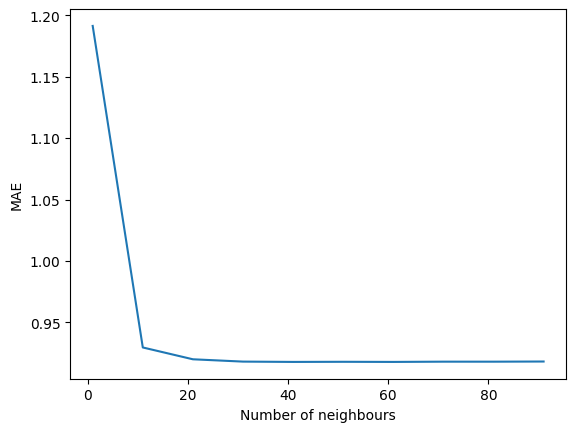

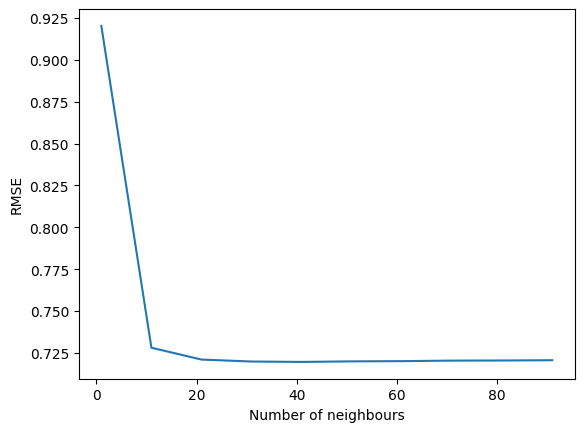

In [2]:
import matplotlib.pyplot as plt
# We'll use the KNN algorithm for user-based
sim_options = {"name": "pearson_baseline"}

# Create empty lists to store the MAE and RMSE values
mae_values = []
rmse_values = []

# Loop through the number of neighbours from 1 to 100 with step 10
for N in range(1, 101,10):
    algo = KNNBaseline(N,sim_options=sim_options)
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    # Append the MAE and RMSE values to the lists
    mae_values.append(rmse)
    rmse_values.append(mae)

# Plot the MAE values
plt.plot(range(1, 101,10), mae_values)
plt.xlabel('Number of neighbours')
plt.ylabel('MAE')
plt.show()

# Plot the RMSE values
plt.plot(range(1, 101,10), rmse_values)
plt.xlabel('Number of neighbours')
plt.ylabel('RMSE')
plt.show()


In [ ]:
#Plot the diagram for item-based method with neighbours from 1-100 with step 10


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1882
MAE:  0.8999
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9257
MAE:  0.7220
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9169
MAE:  0.7173
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9151
MAE:  0.7169
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9147
MAE:  0.7171
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9145
MAE:  0.7173
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9147
MAE:  0.7177

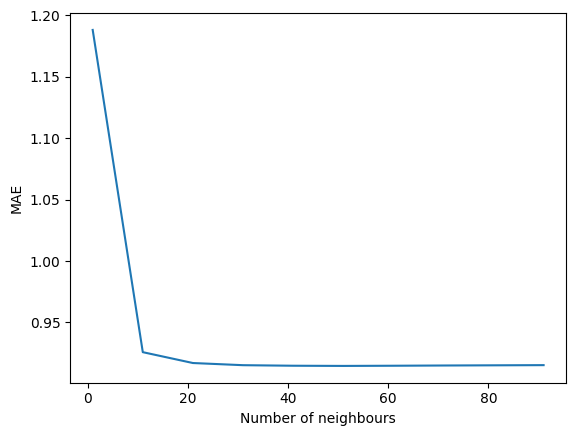

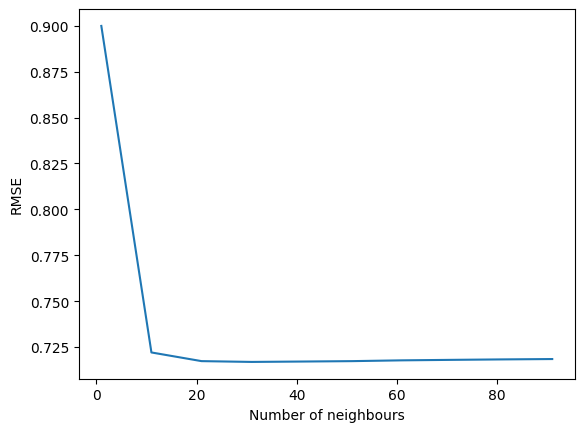

In [78]:
# We'll use the KNN algorithm for item-based
sim_options = {"name": "pearson_baseline", "user_based": False}

# Create empty lists to store the MAE and RMSE values
mae_values = []
rmse_values = []

# Loop through the number of neighbours from 1 to 100 with step 10
for N in range(1, 101,10):
    algo = KNNBaseline(N,sim_options=sim_options)
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    # Append the MAE and RMSE values to the lists
    mae_values.append(rmse)
    rmse_values.append(mae)

# Plot the MAE values
plt.plot(range(1, 101,10), mae_values)
plt.xlabel('Number of neighbours')
plt.ylabel('MAE')
plt.show()

# Plot the RMSE values
plt.plot(range(1, 101,10), rmse_values)
plt.xlabel('Number of neighbours')
plt.ylabel('RMSE')
plt.show()


In [ ]:
# As we can see with the increasing of number of neighbors, both MAE and RMSE are decreasing which means the 
# results become more reliable

In [ ]:
#Find the relation between Top N size and MAE

In [10]:
# We'll use the KNN algorithm for user-based
sim_options = {"name": "pearson_baseline"}
algo = KNNBaseline(sim_options=sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
# Then, use the model to predict ratings for all items in the test set
predictions = algo.test(testset)

# Sort the predictions by estimated rating in descending order
predictions.sort(key=lambda x: x.est, reverse=True)

# Print the top N recommendations
N = 10
for prediction in predictions[:N]:
    print(f"User {prediction.uid}, item {prediction.iid}: predicted rating {prediction.est}")



Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
User 472, item 12: predicted rating 5
User 602, item 50: predicted rating 5
User 457, item 98: predicted rating 5
User 46, item 1062: predicted rating 5
User 532, item 1594: predicted rating 5
User 701, item 127: predicted rating 5
User 532, item 98: predicted rating 5
User 592, item 127: predicted rating 5
User 472, item 96: predicted rating 5
User 640, item 134: predicted rating 5


In [4]:
predictions

[Prediction(uid='472', iid='12', r_ui=5.0, est=5, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='602', iid='50', r_ui=5.0, est=5, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='457', iid='98', r_ui=5.0, est=5, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='46', iid='1062', r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='532', iid='1594', r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='701', iid='127', r_ui=4.0, est=5, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='532', iid='98', r_ui=5.0, est=5, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='592', iid='127', r_ui=5.0, est=5, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='472', iid='96', r_ui=5.0, est=5, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='640', iid='134', r_ui=5.0, est=5, details={'actual_k': 40, 'wa

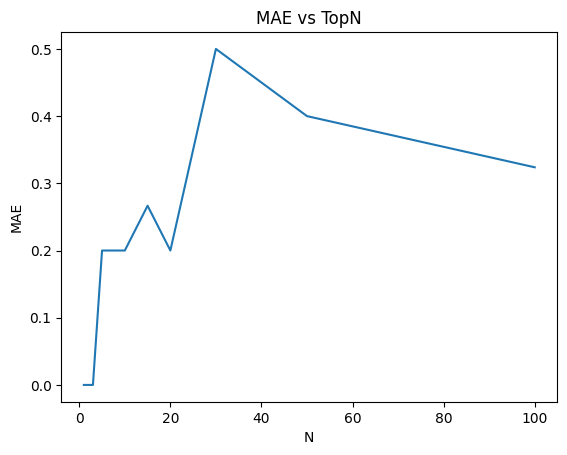

In [8]:
# Define a list of values for N
n_values = [1, 3, 5, 10, 15, 20, 30, 40, 50, 100]

# Create a list to store the MAE values for each value of N
mae_values = []

# Iterate over the values of N
for n in n_values:
    # Predict ratings for the test set
    predictions = algo.test(testset)

    # Sort the predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top N recommendations
    recommendations = predictions[:n]

    # Extract the true ratings and predicted ratings for the top N recommendations
    true_ratings = [prediction.r_ui for prediction in recommendations]
    predicted_ratings = [prediction.est for prediction in recommendations]

    # Calculate the MAE for the top N recommendations
    mae = sum(abs(true - predicted) for true, predicted in zip(true_ratings, predicted_ratings)) / len(true_ratings)


    # Add the MAE value to the list
    mae_values.append(mae)

# Plot the MAE values
plt.plot(n_values, mae_values)
plt.xlabel("N")
plt.ylabel("MAE")
plt.title("MAE vs TopN")
plt.show()


In [ ]:
# From the graph we can see, the MAE changes with a threshold of Topn size
# It increases from the beginning but starts to decrease after the threshold

In [ ]:
# Here we try to find popularity and average rating of each item 
# in the predictions

In [15]:
# We'll use the KNN algorithm for user-based
sim_options = {"name": "pearson_baseline"}
algo = KNNBaseline(sim_options=sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
# Then, use the model to predict ratings for all items in the test set
predictions = algo.test(testset)

# Sort the predictions by estimated rating in descending order
predictions.sort(key=lambda x: x.est, reverse=True)

# Create a dictionary to store the number of times each item appears in the predictions
item_counts = {}

# Create a dictionary to store the average rating for each item
item_ratings = {}


# Print the top N recommendations
N = 10
for prediction in predictions[:N]:
    # Get the item ID, true rating, and predicted rating
    item_id = prediction.iid
    true_rating = prediction.r_ui
    predicted_rating = prediction.est

    # Increment the item count and add the true rating to the item's rating sum
    if item_id in item_counts:
        item_counts[item_id] += 1
        item_ratings[item_id] += true_rating
    else:
        item_counts[item_id] = 1
        item_ratings[item_id] = true_rating

# Compute the average rating for each item
for item_id in item_ratings:
    item_ratings[item_id] /= item_counts[item_id]

# Print the item counts and average ratings
for prediction in predictions[:N]:
    # Get the item ID and predicted rating
    item_id = prediction.iid
    predicted_rating = prediction.est

    # Get the number of ratings and average rating for the item
    num_ratings = item_counts[item_id]
    avg_rating = item_ratings[item_id]

    print(f"Item {item_id}: predicted rating {predicted_rating}, {num_ratings} ratings, average rating {avg_rating:.2f}")


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Item 12: predicted rating 5, 1 ratings, average rating 5.00
Item 50: predicted rating 5, 1 ratings, average rating 5.00
Item 98: predicted rating 5, 2 ratings, average rating 5.00
Item 1062: predicted rating 5, 1 ratings, average rating 5.00
Item 1594: predicted rating 5, 1 ratings, average rating 4.00
Item 127: predicted rating 5, 2 ratings, average rating 4.50
Item 98: predicted rating 5, 2 ratings, average rating 5.00
Item 127: predicted rating 5, 2 ratings, average rating 4.50
Item 96: predicted rating 5, 1 ratings, average rating 5.00
Item 134: predicted rating 5, 1 ratings, average rating 5.00


In [ ]:
# #Here we can see that the system recommend rare ones with high ratings

In [ ]:
# When the neigbourhood (similar users or items to a target user or a 
# certain item) is too small, of course we 'd better use Hybrid methods to deal with  
# cold start and the sparsity problem. We still can use MAE and RMSE to evaluate the confidence of it.

In [ ]:
# Check difference between user-based and item-based Top n list

In [21]:
# We'll use the KNN algorithm for user-based
sim_options = {"name": "pearson_baseline"}
algo_user_based = KNNBaseline(sim_options=sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
algo_user_based.fit(trainset)
# Then, use the model to predict ratings for all items in the test set
predictions_user_based = algo_user_based.test(testset)

# Sort the predictions made by the user-based approach in descending order based on the estimated rating
predictions_user_based.sort(key=lambda x: x.est, reverse=True)

# We'll use the KNN algorithm for item-based
sim_options = {"name": "pearson_baseline", "user_based": False}
algo_item_based = KNNBaseline(sim_options=sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
algo_item_based.fit(trainset)
# Then, use the model to predict ratings for all items in the test set
predictions_item_based = algo_item_based.test(testset)

# Sort the predictions made by the item-based approach in descending order based on the estimated rating
predictions_item_based.sort(key=lambda x: x.est, reverse=True)

# Initialize counters for the number of common predictions in the top N recommendations for each approach
num_common_predictions_user_based = 0
num_common_predictions_item_based = 0

# Set the value of N (number of recommendations to consider)
N = 100

# Iterate over the sorted predictions made by the user-based approach
for i, prediction_user_based in enumerate(predictions_user_based[:N]):
    # Check if the prediction is present in the top N recommendations for the item-based approach
    if prediction_user_based in predictions_item_based[:N]:
        # If so, increment the counter for the user-based approach
        num_common_predictions_user_based += 1

# Print the number of common predictions 
print(f"Number of common predictions : {num_common_predictions_user_based}")


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Number of common predictions : 17


In [ ]:
# Then we check their MAE evaluation 

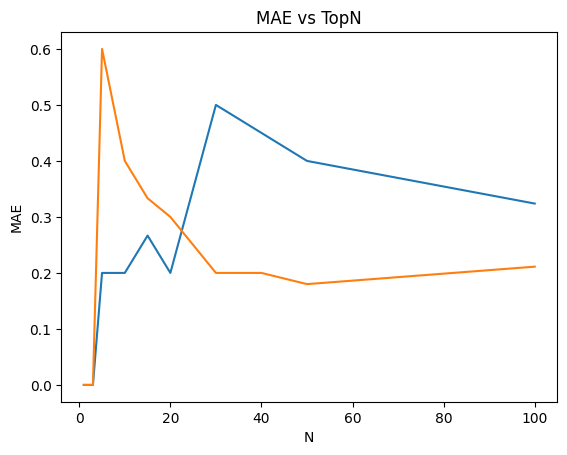

In [22]:
# Define a list of values for N
n_values = [1, 3, 5, 10, 15, 20, 30, 40, 50, 100]

# Create a list to store the MAE values for each value of N
mae_values_u = []
mae_values_i = []

# Iterate over the values of N
for n in n_values:

    # Get the top N recommendations
    recommendations_u = predictions_user_based[:n]
    recommendations_i = predictions_item_based[:n]

    # Extract the true ratings and predicted ratings for the top N recommendations
    true_ratings_u = [predictions_user_based.r_ui for predictions_user_based in recommendations_u]
    predicted_ratings_u = [predictions_user_based.est for predictions_user_based in recommendations_u]
    true_ratings_i = [predictions_item_based.r_ui for predictions_item_based in recommendations_i]
    predicted_ratings_i = [predictions_item_based.est for predictions_item_based in recommendations_i]
    # Calculate the MAE for the top N recommendations
    maeu = sum(abs(true - predicted) for true, predicted in zip(true_ratings_u, predicted_ratings_u)) / len(true_ratings_u)
    maei = sum(abs(true - predicted) for true, predicted in zip(true_ratings_i, predicted_ratings_i)) / len(true_ratings_i)


    # Add the MAE value to the list
    mae_values_u.append(maeu)
    mae_values_i.append(maei)
# Plot the MAE values
plt.plot(n_values, mae_values_u)
plt.plot(n_values, mae_values_i)
plt.xlabel("N")
plt.ylabel("MAE")
plt.title("MAE vs TopN")
plt.show()


In [ ]:
# Yellow one indicates Item-based and Blue one indicates User-based
# It shows that Item-based method is more sensitive about Top N size

In [25]:
from sklearn.metrics import mean_absolute_error

# Define the range of values for beta that you want to consider
betas = [i/10 for i in range(0, 11)]

# Initialize a list to store the mean absolute errors (MAEs) for each value of beta
maes = []

# Iterate over the values of beta
for beta in betas:
    # Initialize a list to store the new estimated ratings for each prediction
    new_estimations = []
    
    # Iterate over the predictions made by the user-based approach
    for prediction_user_based in predictions_user_based:
        # Find the corresponding prediction made by the item-based approach
        prediction_item_based = next(prediction for prediction in predictions_item_based if prediction.uid == prediction_user_based.uid and prediction.iid == prediction_user_based.iid)
        
        # Compute the new estimated rating by combining the predictions made by the user-based and item-based approaches
        new_estimation = beta*prediction_user_based.est + (1-beta)*prediction_item_based.est
        
        # Append the new estimated rating to the list
        new_estimations.append(new_estimation)
        
    # Calculate the MAE between the true ratings and the new estimated ratings
    mae = mean_absolute_error([prediction.r_ui for prediction in predictions_user_based], new_estimations)
    print('processing')# too long waiting just check if it's working
    # Append the calculated MAE to the list of MAEs
    maes.append(mae)

# Find the index of the minimum MAE in the list of MAEs
min_mae_index = maes.index(min(maes))

# Print the value of beta corresponding to the minimum MAE
print(f"Optimal beta: {betas[min_mae_index]}")


processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
Optimal beta: 0.4


In [31]:
from sklearn.metrics import mean_absolute_error

# Define the range of values for beta that you want to consider
betas = [i/10 for i in range(0, 11)]

# Define the range of values for the number of neighbors that you want to consider
neighbors = [i for i in range(1, 101, 10)]

# Initialize a list to store the mean absolute errors (MAEs) for each combination of values of beta and neighbors
maes = []

# Iterate over the values of beta
for beta in betas:
    # Iterate over the values of neighbors
    for n in neighbors:
        # We'll use the KNN algorithm for user-based
        sim_options = {"name": "pearson_baseline"}
        algo_user_based = KNNBaseline(n,sim_options=sim_options)

        # Train the algorithm on the trainset, and predict ratings for the testset
        algo_user_based.fit(trainset)
        # Then, use the model to predict ratings for all items in the test set
        predictions_user_based = algo_user_based.test(testset)

        # We'll use the KNN algorithm for item-based
        sim_options = {"name": "pearson_baseline", "user_based": False}
        algo_item_based = KNNBaseline(n,sim_options=sim_options)

        # Train the algorithm on the trainset, and predict ratings for the testset
        algo_item_based.fit(trainset)
        # Then, use the model to predict ratings for all items in the test set
        predictions_item_based = algo_item_based.test(testset)

        # Initialize a list to store the new estimated ratings for each prediction
        new_estimations = []
        
        # Iterate over the predictions made by the user-based approach
        for prediction_user_based in predictions_user_based:
            # Find the corresponding prediction made by the item-based approach
            prediction_item_based = next(prediction for prediction in predictions_item_based if prediction.uid == prediction_user_based.uid and prediction.iid == prediction_user_based.iid)
            
            # Compute the new estimated rating by combining the predictions made by the user-based and item-based approaches
            new_estimation = beta*prediction_user_based.est + (1-beta)*prediction_item_based.est
            
            # Append the new estimated rating to the list
            new_estimations.append(new_estimation)
        
        # Calculate the MAE between the true ratings and the new estimated ratings
        mae = mean_absolute_error([prediction.r_ui for prediction in predictions_user_based], new_estimations)
        print('processing',n,beta)# too long waiting just check if it's working
        # Append the calculated MAE to the list of MAEs
        maes.append((mae, beta, n))

# Find the index of the minimum MAE in the list of MAEs
min_mae_index = maes.index(min(maes))

# Print the values of beta and neighbors corresponding to the minimum MAE
print(f"Optimal MAE: {maes[min_mae_index][0]}")
print(f"Optimal beta: {maes[min_mae_index][1]}")
print(f"Optimal number of neighbors: {maes[min_mae_index][2]}")


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 1 0.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 11 0.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 21 0.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 

Done computing similarity matrix.
processing 21 0.3
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 31 0.3
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 41 0.3
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 51 0.3
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity ma

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 51 0.6
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 61 0.6
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 71 0.6
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 81 0.6
Estimating biases using als...
Computing the pearson_baseline similarity ma

processing 71 0.9
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 81 0.9
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 91 0.9
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
processing 1 1.0
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity m

In [ ]:
# Optimal MAE: 0.7108199482973331
# Optimal beta: 0.4
# Optimal number of neighbors: 21